In [129]:
import numpy as np
import calendar
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
df = pd.read_csv(r"C:\Users\homeA\Desktop\Python - Youtube\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [130]:
df_us = df[df['job_country']=='India']
df_us_skills = df_us.explode('job_skills')


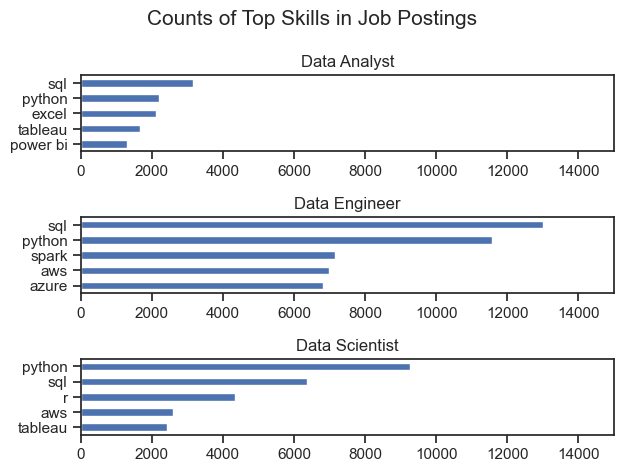

In [137]:
# Here we are getting top Skills number for each job
df_skills_count =  df_us_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)
df_skills_count

# Now we want top 3 elements from the list of job_title_short

job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])


# Now we want to plot all these 3 Graphs
fig, ax = plt.subplots(len(job_titles), 1)



for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title = job_title, legend = False)
    ax[i].set_xlim(0,15000)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout()
plt.show()

In [132]:
# Now we want to convert the above to % Terms
df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [133]:
# This gives a total number of jobs
df_jobs_counts = df_us['job_title_short'].value_counts().reset_index(name='total_jobs')
df_jobs_counts

,job_title_short,total_jobs
0,Data Engineer,19062
1,Data Scientist,13279
2,Data Analyst,6121
3,Senior Data Engineer,4353
4,Senior Data Scientist,2486
5,Business Analyst,1887
6,Software Engineer,1795
7,Senior Data Analyst,1083
8,Machine Learning Engineer,671
9,Cloud Engineer,351


In [134]:
df_skill_percent = pd.merge(df_skills_count, df_jobs_counts, how='left', on='job_title_short')
df_skill_percent['skill_percent'] = 100* df_skill_percent['skill_count'] / df_skill_percent['total_jobs']
df_skill_percent

,job_skills,job_title_short,skill_count,total_jobs,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


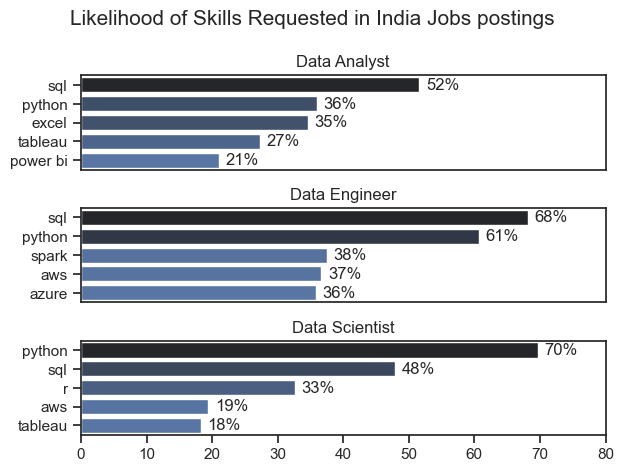

In [138]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skill_percent[df_skill_percent['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r') 
    ax[i].set_xlim(0,80)
    ax[i].set_title(job_title)
    # ax[i].invert_yaxis()
    ax[i].legend().set_visible(False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n ,f'{v:.0f}%' ,va='center')

    if i != len(job_titles)-1:
     ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in India Jobs postings', fontsize = 15)
fig.tight_layout()
plt.show()